# Explaining Political Polarization
# Mariam Arzumanyan
## Simulation and Plots Under Uniform Distribution



In [1]:
# import necessary modules
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
#import scipy.special as sc
#import seaborn as sns
from scipy import integrate
plt.style.use( 'seaborn-ticks')


In [2]:
#sns.set(rc={'figure.figsize':(20,10)}, font_scale=2)
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

 Consider an election game where two parties, the Left and the Right, enter the election at no cost with a  pre-commitment on the platforms. The Left has an ideal policy position at $\theta_L$, and the Right has an ideal policy position at $\theta_R$. Assume that both parties' proposed policies are fixed at $-1\leq\theta_L\leq \theta_R\leq 1$. In this section, the parties cannot credibly change the policy positions from their ideal positions. The following sections will discuss the office-motivated.  

Suppose there is a continuum of citizens with ideal policy positions distributed over the $[-1, 1]$ interval with cumulative distribution function $F(\cdot)$ and probability distribution function $f(\cdot)$. In this simulation, $F(\cdot)$ is a **Uniform** distribution. 


Every citizen with ideal policy $i\in [-1,1]$ has a utility function $u_i(\theta)=-(i-\theta)^2$, where $\theta$ is the winning policy. The majority rule determines the winner in the election, and each citizen has three actions available: vote for Left, vote for Right, or abstain from voting.
 The citizen $i$ will support the Left if and only if $u_i(\theta_L)> u_i(\theta_R)$, or when  $i\in \Theta_L$, where
\begin{equation}\label{eq:leftsettheta}
    \Theta_L=\{i\in [-1,1]: u_i(\theta_L)> u_i(\theta_R)\}.
\end{equation}

Accordingly, the citizen $i$ will support the Right if and only if $u_i(\theta_R)> u_i(\theta_L)$, or when  $i\in \Theta_R$, where
\begin{equation}\label{eq:rightsettheta}
    \Theta_R=\{i\in [-1,1]: u_i(\theta_R)> u_i(\theta_L)\}.
\end{equation}


In [3]:
# Define the share of the Left and The Right under Uniform distribution   
def s_L(theta_L, theta_R):
    return (theta_L+theta_R+2)/4


def s_R(theta_L, theta_R):
    return (2-theta_L-theta_R)/4



In [34]:
print(r"Share of the Left party supporters when $\theta_L=-0.25$ and $\theta_R=0$ is ", s_L(-0.25, 0))
print(r"Share of the Right party supporters when $\theta_L=-0.25$ and $\theta_R=0$ is ", s_R(-0.25, 0))

Share of the Left party supporters when $\theta_L=-0.25$ and $\theta_R=0$ is  0.4375
Share of the Right party supporters when $\theta_L=-0.25$ and $\theta_R=0$ is  0.5625


Define the utility function $u_i(\theta)=-(i-\theta)^2$.

In [10]:
def u(i, theta):
    return -(i-theta)**2

Denote by $\phi_L=\phi_L(\theta_L, \theta_R)=\int_{\Theta_L}\left(u_i(\theta_L) -u_i(\theta_R) \right)dF(i)$. It can be interpreted as the importance of winning an election for the Left.

In [11]:
# define the importance of Left
def phi_L(theta_L, theta_R,s):
   a_1=(theta_R**2-theta_L**2)*s
   a_2=0.5*(theta_R-theta_L)*(1-0.25*(theta_L+theta_R)**2)
   return a_1+a_2

def phill(theta_L, theta_R,s):
    return 2*s**2*(theta_R-theta_L)


def phirr(theta_L, theta_R,s):
    return 2*s**2*(theta_R-theta_L)

print(phi_L(-0.5,-0.25, s_L(-0.5,0)))



0.037109375


In [13]:
# the importance of Right
def phi_R(theta_L, theta_R,s):
   a_1=-(theta_R**2-theta_L**2)*s
   a_2=0.5*(theta_R-theta_L)*(1-0.25*(theta_L+theta_R)**2)
   return a_1+a_2

print(phi_R(0.25,0.5, s_R(0,0.5)))

0.037109375


Figures below, depicts the values of  $\phi_L(\theta_L,\theta_R)$ and $\phi_R(\theta_L,\theta_R)$ for different combinations  of values of $\theta_L$ and $\theta_R$. The top graph plots $\phi_L(\theta_L,\theta_R)$ where $\theta_R\in\{0,0.25, 0.5,0.75,1\}$ and $\theta_L\in [-1,\theta_R]$. The bottom graph plots $\phi_r(\theta_L,\theta_R)$ where $\theta_L\in\{-1,-0.75, -0.5,-0.25,0\}$ and $\theta_R\in [-1,\theta_L]$. It is clear from plots that  $\phi_L(\theta_L,\theta_R)$ is increasing function of $\theta_R$, and $\phi_R(\theta_L,\theta_R)$  is an increasing function of $\theta_L$. Also,  $\phi_L(\theta_L,\theta_R)$ and $\phi_R(\theta_L,\theta_R)$  are  positive and only equal to zero when $\theta_L=\theta_R$. 

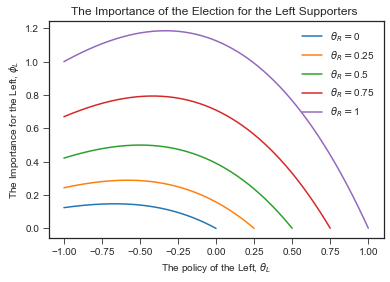

In [12]:

for theta_R in (0, 0.25, 0.5, 0.75, 1): 
    n=1000
    theta_L=-1
    xs=np.arange(-1,theta_R,1/n)
    F=np.arange(-1,theta_R,1/n)
    for i in range(len(xs)):
        F[i]=phi_L(theta_L, theta_R,s_L(theta_L, theta_R))
        theta_L+=1/n
    plt.plot(xs, F, label=r'$\theta_R=$'f'{theta_R}')
plt.legend()
plt.ylabel(r"The Importance for the Left, $\phi_L$")
plt.xlabel(r"The policy of the Left, $\theta_L$")
plt.title(r"The Importance of the Election for the Left Supporters ")
plt.savefig('C:\\Users\\arzum\\Downloads\\phil.eps', format='eps')
plt.show()

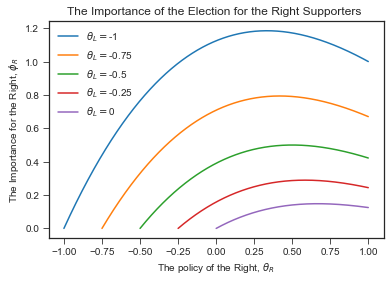

In [14]:

for theta_L in (-1, -0.75, -0.5,  -0.25, 0): 
    n=1000
    theta_R=theta_L
    xs=np.arange(theta_L,1,1/n)
    F=np.arange(theta_L,1,1/n)
    for i in range(len(xs)):
        F[i]=phi_R(theta_L, theta_R,s_R(theta_L, theta_R))
        theta_R+=1/n
    plt.plot(xs, F, label=r'$\theta_L=$'f'{theta_L}')
plt.legend(loc='upper left')
plt.ylabel(r"The Importance for the Right, $\phi_R$")
plt.xlabel(r"The policy of the Right, $\theta_R$")
plt.title(r"The Importance of the Election for the Right Supporters ")
plt.savefig('C:\\Users\\arzum\\Downloads\\phir.eps', format='eps')
plt.show()



The derivation of the closed form  solutions for   $(c_L^*(\theta_L, \theta_R), c_R^*(\theta_L, \theta_R))$  are characterized under the assumption that $F(\cdot)$ is the uniform distribution over $[-1,1]$ and can be found in the Appendix 2. 

In [15]:


###########################
######################
################### Create cost thresholds for the Left

def c_L(theta_L, theta_R, c):
    phil=phi_L(theta_L,theta_R, s_L(theta_L, theta_R))
    phir=phi_R(theta_L,theta_R, s_R(theta_L, theta_R))
    sl=s_L(theta_L, theta_R)
    sr=s_R(theta_L, theta_R)
    if theta_L == theta_R:
        return 0
    elif theta_L+theta_R==0:
        if phil==0:
            return 0
        elif 4*phil**2<c:
            return 2*math.sqrt(c)*phil
        else: 
            return c
    
    elif theta_L+theta_R<0:
        if c>math.sqrt(phil*phir*sl/sr**3):
            return math.sqrt(c)*math.pow(phil**3/(phir*sr*sl), 0.25)
        elif phil/sr < c < math.sqrt(phil*phir*sl/sr**3):
            return phil/sr
        else: 
            return c
    else:
        if c>math.sqrt(phil*phir*sr/sl**3):
            return math.sqrt(c)*math.pow(phil*phir*sr/(sl**3), 0.25)
        else:
            return c



In [16]:


###########################
######################
################### Create cost thresholds for the Right
def c_R(theta_L, theta_R, c):
    phil=phi_L(theta_L,theta_R, s_L(theta_L, theta_R))
    phir=phi_R(theta_L,theta_R, s_R(theta_L, theta_R))
    sl=s_L(theta_L, theta_R)
    sr=s_R(theta_L, theta_R)
    
    if theta_L==theta_R:
        return 0
    elif theta_L+theta_R==0:
        if phil==0:
            return 0
        elif 4*phil**2<c:
            return 2*math.sqrt(c)*phil
        else: 
            return c
  
    elif theta_L+theta_R<0:
        if c>math.sqrt(phil*phir*sl/sr**3):
            return math.sqrt(c)*math.pow(phil*phir*sl/sr**3, 0.25)
        else: 
            return c
    else:
        if c>math.sqrt(phil*phir*sr/sl**3):
            return math.sqrt(c)*math.pow(phir**3/(phil*sr*sl), 0.25)
        elif phir/sl < c <= math.sqrt(phil*phir*sr/sl**3):
            return phir/sl
        else:
            return c



## Plot the Expected Fraction of Votes for the Left and Right

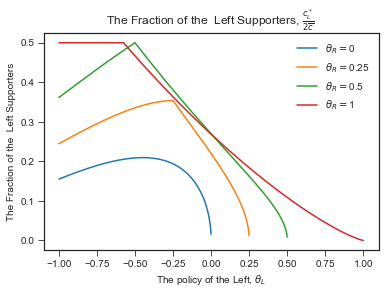

In [17]:

for theta_R in (0, 0.25, 0.5,  1): 
    c=1
    n=1000
    theta_L=-1
    xs=np.arange(-1,theta_R,1/n)
    F=np.arange(-1,theta_R,1/n)
    for i in range(len(xs)):
        F[i]=0.5*c_L(theta_L, theta_R,c)
        theta_L+=1/n
    plt.plot(xs, F, label=r'$\theta_R=$'f'{theta_R}')
plt.legend()
plt.ylabel(r"The Fraction of the  Left Supporters")
plt.xlabel(r"The policy of the Left, $\theta_L$")
plt.title(r"The Fraction of the  Left Supporters, $\frac{c_L^*}{2\overline{c}}$ ")
plt.savefig('C:\\Users\\arzum\\Downloads\\fractionl.eps', format='eps')
plt.show()



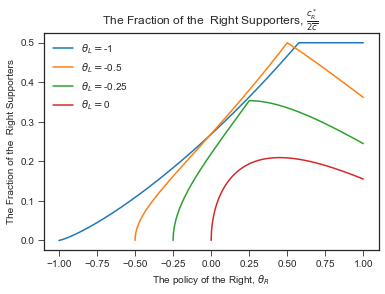

In [18]:

for theta_L in (-1, -0.5,-0.25,0): 
    n=1000
    c=1
    theta_R=theta_L
    xs=np.arange(theta_L,1,1/n)
    F=np.arange(theta_L,1,1/n)
    for i in range(len(xs)):
        F[i]=0.5*c_R(theta_L, theta_R,c)
        theta_R+=1/n
    plt.plot(xs, F, label=r'$\theta_L=$'f'{theta_L}')
plt.legend()
plt.ylabel(r"The Fraction of the  Right Supporters")
plt.xlabel(r"The policy of the Right, $\theta_R$")
plt.title(r"The Fraction of the  Right Supporters, $\frac{c_R^*}{2\overline{c}}$ ")
plt.savefig('C:\\Users\\arzum\\Downloads\\fractionr.eps', format='eps')
plt.show()


## Plot the Expected turnout for the Left and Right

In [19]:

########################### 
##########################  Turnout 

def T_L(s,c_l, c):
    return 0.5*s*c_l/c

theta_R=0
theta_L=-0.75
c=1
T_L(s_L(theta_L, theta_R),c_L(theta_L, theta_R, c),c)

def T_R(s,c_l,c):
    return 0.5*s*c_l/c
    


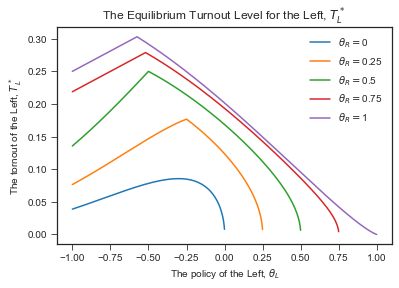

In [20]:

for theta_R in (0, 0.25, 0.5, 0.75, 1): 
    c=1
    n=1000
    theta_L=-1
    xs=np.arange(-1,theta_R,1/n)
    F=np.arange(-1,theta_R,1/n)
    for i in range(len(xs)):
        F[i]=T_L(s_L(theta_L, theta_R),c_L(theta_L, theta_R, c),c)

        theta_L+=1/n
    plt.plot(xs, F, label=r'$\theta_R=$'f'{theta_R}')
plt.legend()
plt.ylabel(r"The tornout of the Left, $T_L^*$")
plt.xlabel(r"The policy of the Left, $\theta_L$")
plt.title(r"The Equilibrium Turnout Level for the Left, $T_L^*$ ")
plt.savefig('C:\\Users\\arzum\\Downloads\\tl.eps', format='eps')
plt.show()


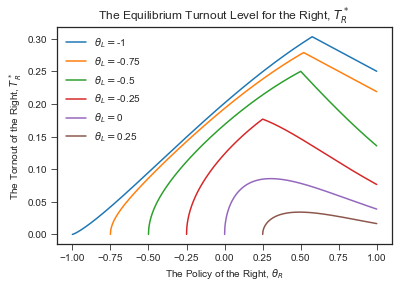

In [21]:

for theta_L in (-1, -0.75,-0.5,-0.25,0,0.25): 
    n=1000
    c=1
    theta_R=theta_L
    xs=np.arange(theta_L,1,1/n)
    F=np.arange(theta_L,1,1/n)
    for i in range(len(xs)):
        F[i]=T_R(s_R(theta_L, theta_R),c_R(theta_L, theta_R, c),c)
        theta_R+=1/n
    plt.plot(xs, F, label=r'$\theta_L=$'f'{theta_L}')
plt.legend()
plt.ylabel(r"The Tornout of the Right, $T_R^*$")
plt.xlabel(r"The Policy of the Right, $\theta_R$")
plt.title(r"The Equilibrium Turnout Level for the Right, $T_R^*$ ")
plt.savefig('C:\\Users\\arzum\\Downloads\\tr.eps', format='eps')
plt.show()

## Plot the Probability of the Victory for the Left and Right

In [23]:
# Cumulative distribution function of two Uniform distribution division       
def G(x):
    if x<0:
        return 0
    elif x<=1:
        return x/2
    else:
        return 1-1/(2*x)

In [24]:

##################### Define probability of winning 

def prob_L(theta_L, theta_R,c):
    sl=s_L(theta_L, theta_R)
    sr=s_R(theta_L, theta_R)
    cl=c_L(theta_L, theta_R,c)
    cr=c_R(theta_L, theta_R,c)
    if theta_L == theta_R:
        return 0.5
    else:
        return G(sl*cl/(sr*cr))
sl=s_L(theta_L, theta_R)
sr=s_R(theta_L, theta_R)
cl=c_L(theta_L, theta_R,c)
cr=c_R(theta_L, theta_R,c)


def prob_R(theta_L, theta_R,c):
    sl=s_L(theta_L, theta_R)
    sr=s_R(theta_L, theta_R)
    cl=c_L(theta_L, theta_R,c)
    cr=c_R(theta_L, theta_R,c)
    if theta_L == theta_R:
        return 0.5
    else:
        return G((sr*cr)/(sl*cl))
sl=s_L(theta_L, theta_R)
sr=s_R(theta_L, theta_R)
cl=c_L(theta_L, theta_R,c)
cr=c_R(theta_L, theta_R,c)

theta_R=1
theta_L=0.9
c=0.95
print(prob_L(theta_L, theta_R,c))

0.9979470749512168


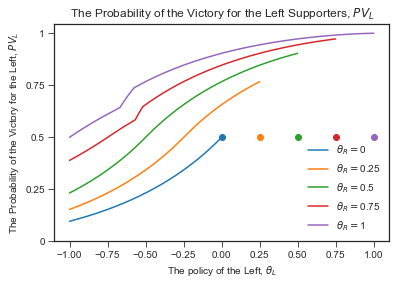

In [25]:


for theta_R in (0, 0.25, 0.5, 0.75, 1): 
    n=1000
    c=1
    theta_L=-1
    xs=np.arange(-1,theta_R,1/n)
    F=np.arange(-1,theta_R,1/n)
    for i in range(len(xs)):
        
        F[i]=prob_L(theta_L, theta_R,c)
        theta_L+=1/n
    plt.plot(xs, F, label=r'$\theta_R=$'f'{theta_R}')
    plt.scatter(theta_R, 0.5)
plt.legend()
plt.ylabel(r"The Probability of the Victory for the Left, $PV_L$")
plt.yticks([0, 0.25, 0.5,0.75,1], [0, 0.25, 0.5,0.75,1])
plt.xlabel(r"The policy of the Left, $\theta_L$")
plt.title(r"The Probability of the Victory for the Left Supporters, $PV_L$")
plt.savefig('C:\\Users\\arzum\\Downloads\\pvl.eps', format='eps')
plt.show()



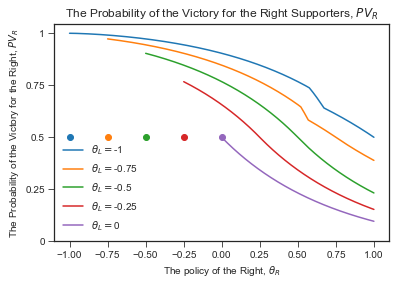

In [26]:

for theta_L in (-1, -0.75,-0.5,-0.25,0): 
    n=1000
    c=1
    theta_R=theta_L+1/n
    xs=np.arange(theta_L,1,1/n)
    F=np.arange(theta_L,1,1/n)
    for i in range(len(xs)):
        F[i]=prob_R(theta_L, theta_R,c)
        theta_R+=1/n
    plt.plot(xs, F, label=r'$\theta_L=$'f'{theta_L}')
    plt.scatter(theta_L, 0.5)
plt.legend()
plt.yticks([0, 0.25, 0.5,0.75,1], [0, 0.25, 0.5,0.75,1])

plt.ylabel(r"The Probability of the Victory for the Right, $PV_R$")
plt.xlabel(r"The policy of the Right, $\theta_R$")
plt.title(r"The Probability of the Victory for the Right Supporters, $PV_R$")
plt.savefig('C:\\Users\\arzum\\Downloads\\pvr.eps', format='eps')
plt.show()
